In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

reading data + basic info:

In [70]:
df = pd.read_csv('../data/raw/sales_ads_train.csv')

print('dataframe shape: {}'.format(df.shape))
df.head()

dataframe shape: (135397, 25)


,ID,Cena,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,...,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,Wyposazenie
0,1,13900,PLN,Used,Renault,Grand Espace,Gr 2.0T 16V Expression,NaN,2005.0,213000.0,...,Manual,minivan,5.0,blue,NaN,NaN,NaN,28/04/2021,"SŁONECZNA 1 - 99-300 Kutno, kutnowski, Łódzkie...","['ABS', 'Electric front windows', 'Drivers air..."
1,2,25900,PLN,Used,Renault,Megane,1.6 16V 110,III (2008-2016),2010.0,117089.0,...,Manual,station_wagon,5.0,silver,NaN,NaN,16/06/2010,04/05/2021,"ul. Wiosenna 8 - 41-407 Imielin, Centrum (Polska)","['ABS', 'Electric front windows', 'Drivers air..."
2,3,35900,PLN,Used,Opel,Zafira,Tourer 1.6 CDTI ecoFLEX Start/Stop,C (2011-2019),2015.0,115600.0,...,Manual,minivan,5.0,white,Denmark,NaN,NaN,03/05/2021,"Sianów, koszaliński, Zachodniopomorskie","['ABS', 'Electric front windows', 'Passengers ..."
3,4,5999,PLN,Used,Ford,Focus,1.6 TDCi FX Silver / Silver X,Mk2 (2004-2011),2007.0,218000.0,...,Manual,compact,5.0,blue,NaN,NaN,27/11/2007,02/05/2021,"Gdańsk, Pomorskie, Przymorze Wielkie","['ABS', 'Electric front windows', 'Drivers air..."
4,5,44800,PLN,Used,Toyota,Avensis,1.8,III (2009-),2013.0,NaN,...,Manual,NaN,4.0,other,Poland,Yes,20/05/2013,02/05/2021,"Świdnik, świdnicki, Lubelskie","['ABS', 'Electric front windows', 'Drivers air..."


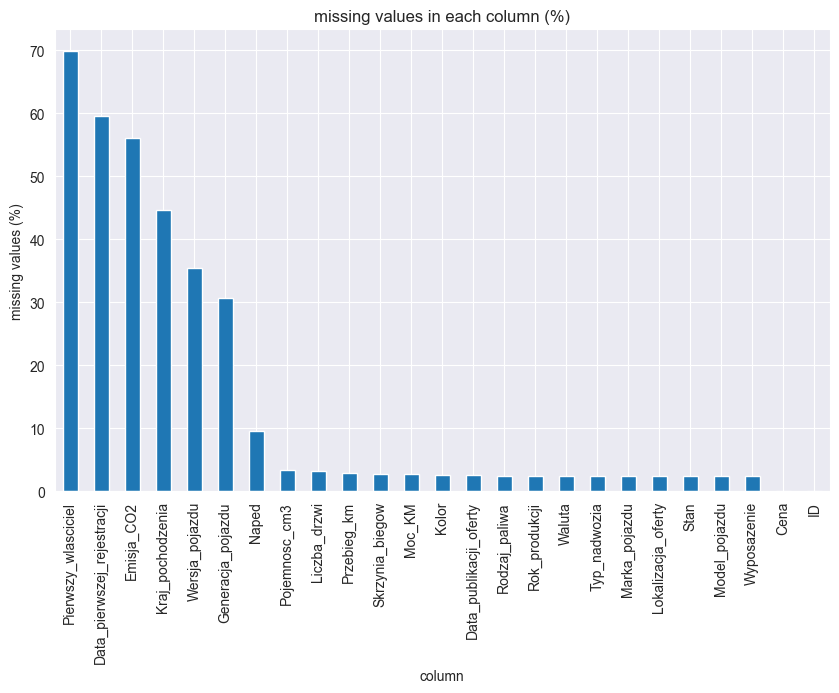

In [7]:
missing_values = df.isnull().sum() / len(df) * 100
missing_values
plt.figure(figsize=(10, 6))
missing_values.sort_values(ascending=False).plot(kind='bar')
plt.title('missing values in each column (%)')
plt.xlabel('column')
plt.ylabel('missing values (%)')
plt.show()

There are no missing values in target column (Cena). Then, % of missing values varies by column. We expect those with over 50% of missing values to have limited significance in predictions.

finding data types, missing values (if any):

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135397 entries, 0 to 135396
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          135397 non-null  int64  
 1   Cena                        135397 non-null  int64  
 2   Waluta                      132021 non-null  object 
 3   Stan                        132075 non-null  object 
 4   Marka_pojazdu               132046 non-null  object 
 5   Model_pojazdu               132088 non-null  object 
 6   Wersja_pojazdu              87336 non-null   object 
 7   Generacja_pojazdu           93737 non-null   object 
 8   Rok_produkcji               131990 non-null  float64
 9   Przebieg_km                 131394 non-null  float64
 10  Moc_KM                      131664 non-null  float64
 11  Pojemnosc_cm3               130711 non-null  float64
 12  Rodzaj_paliwa               131987 non-null  object 
 13  Emisja_CO2    

In [9]:
df.describe()

,ID,Cena,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Emisja_CO2,Liczba_drzwi
count,135397.000000,1.353970e+05,131990.000000,1.313940e+05,131664.000000,130711.000000,5.949700e+04,131033.000000
mean,67699.000000,6.306938e+04,2012.089901,1.531563e+05,151.716696,1881.811753,3.363019e+05,4.635611
std,39085.891536,8.807748e+04,7.003557,3.421378e+06,77.386471,727.605417,8.199407e+07,0.780062
min,1.000000,5.850000e+02,1923.000000,1.000000e+00,1.000000,400.000000,1.000000e+00,1.000000
25%,33850.000000,1.780000e+04,2008.000000,5.300000e+04,105.000000,1461.000000,1.200000e+02,5.000000
50%,67699.000000,3.580000e+04,2013.000000,1.448635e+05,136.000000,1798.000000,1.400000e+02,5.000000
75%,101548.000000,7.599000e+04,2017.000000,2.060000e+05,173.000000,1997.000000,1.640000e+02,5.000000
max,135397.000000,6.999000e+06,2021.000000,1.111111e+09,1398.000000,8400.000000,2.000000e+10,55.000000


Let's check the unique values for each column:

In [10]:
cat_features = [
            "Waluta", "Stan", "Marka_pojazdu", "Model_pojazdu", "Wersja_pojazdu",
            "Generacja_pojazdu", "Rodzaj_paliwa", "Naped", "Skrzynia_biegow",
            "Typ_nadwozia", "Kolor", "Kraj_pochodzenia", "Lokalizacja_oferty", "Pierwszy_wlasciciel",
        ]

for col in cat_features:
    print(f"unique values for {col}:")
    print(len(df[col].unique()), df[col].unique())

unique values for Waluta:
3 ['PLN' nan 'EUR']
unique values for Stan:
3 ['Used' 'New' nan]
unique values for Marka_pojazdu:
103 ['Renault' 'Opel' 'Ford' 'Toyota' 'BMW' 'Audi' 'Volkswagen' 'Hyundai'
 'Kia' 'Nissan' 'Dacia' 'Mazda' 'Volvo' 'Daewoo' 'Fiat' 'Jaguar' 'Škoda'
 'Mitsubishi' 'Peugeot' 'Seat' 'Porsche' 'Honda' 'Jeep' nan 'Citroën'
 'Mercedes-Benz' 'Chevrolet' 'Subaru' 'MINI' 'Alfa Romeo' 'DS Automobiles'
 'Smart' 'Suzuki' 'Buick' 'Ferrari' 'Saab' 'Land Rover' 'Lancia'
 'Cadillac' 'Infiniti' 'Aixam' 'Chrysler' 'SsangYong' 'Lexus' 'Dodge'
 'McLaren' 'Gaz' 'Lada' 'Triumph' 'Lincoln' 'Daihatsu' 'Pontiac' 'Rover'
 'Hummer' 'Tesla' 'Chatenet' 'Wołga' 'Microcar' 'Cupra' 'Maserati' 'RAM'
 'Isuzu' 'MG' 'Warszawa' 'Polonez' 'Acura' 'Moskwicz' 'Rolls-Royce'
 'Ligier' 'Abarth' 'Inny' 'Bentley' 'Trabant' 'Austin' 'Mercury' 'DFSK'
 'Aston Martin' 'GMC' 'DKW' 'Tarpan' 'Uaz' 'FAW' 'Lotus' 'Plymouth' 'Tata'
 'Żuk' 'Zastava' 'Alpine' 'Tavria' 'Casalini' 'Oldsmobile' 'Iveco'
 'Lamborghini' 'Syren

We see that our target is in two currencies (PLN, EUR). We will convert all prices to PLN. We also see that some columns have a lot of unique values. We will need to check if we can reduce the number of unique values in some columns.

basic visualizations:

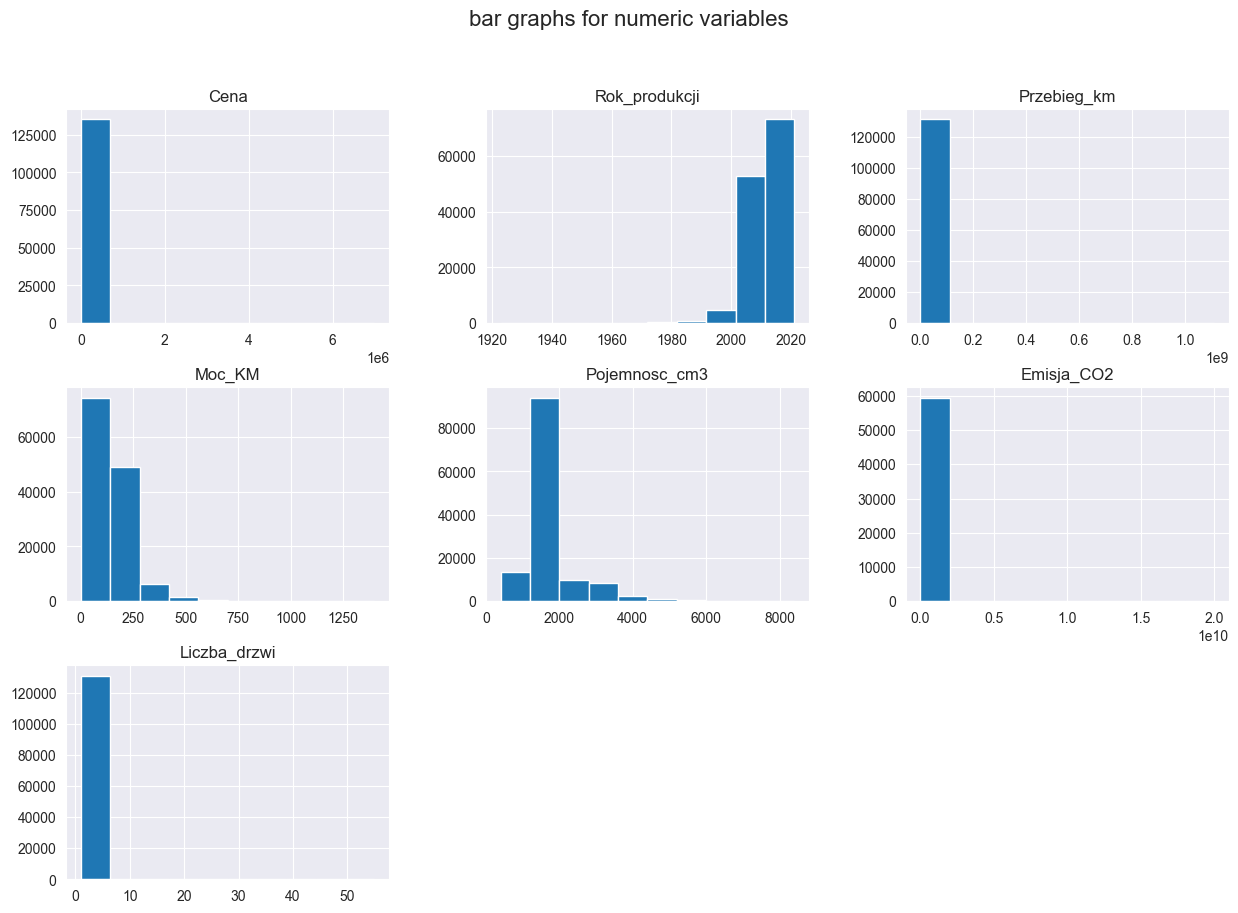

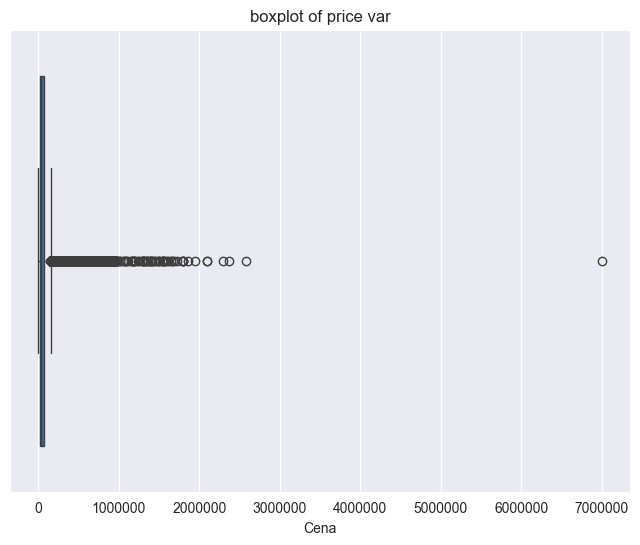

In [11]:
df.drop('ID', axis=1).hist(figsize=(15, 10))
plt.suptitle("bar graphs for numeric variables", fontsize=16)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

# boxplot for 'price' outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Cena')
plt.title('boxplot of price var')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

['PLN', nan, 'EUR']
Cena_PLN
19900.0     1458
29900.0     1251
16900.0     1183
18900.0     1156
17900.0     1132
            ... 
136899.0       1
98154.0        1
196400.0       1
124850.0       1
160190.0       1
Name: count, Length: 11137, dtype: int64


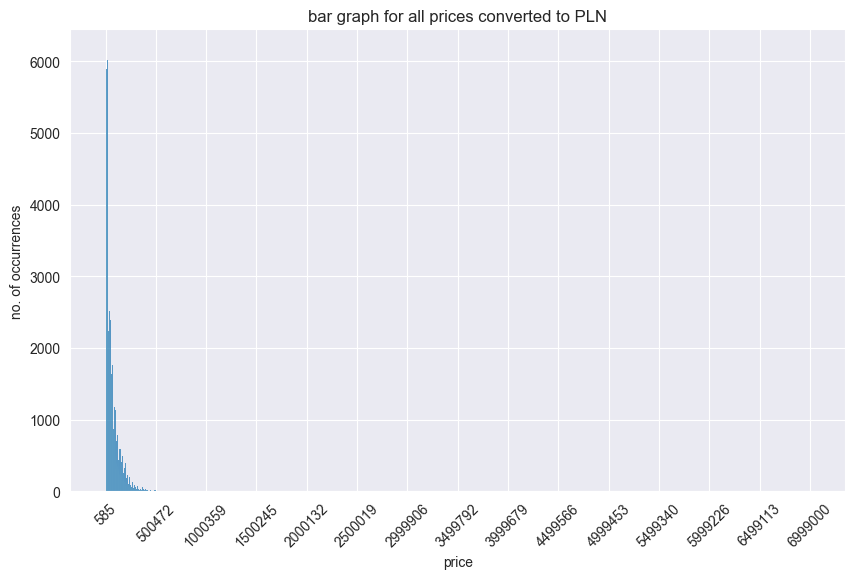

In [71]:
currencies = df['Waluta'].unique().tolist()
print(currencies)

conversion_rates = {'EUR': 4.18, 'PLN': 1.0}
df['Cena_PLN'] = df.apply(lambda row: round(row['Cena'] * conversion_rates.get(row['Waluta'], 1), 0), axis = 1)

print(df['Cena_PLN'].value_counts())

plt.figure(figsize=(10, 6))
sns.histplot(df['Cena_PLN'])
plt.title('bar graph for all prices converted to PLN')
plt.xlabel('price')
plt.ylabel('no. of occurrences')

min = df['Cena_PLN'].min()
max = df['Cena_PLN'].max()

ticks = np.linspace(min, max, num=15)
plt.xticks(ticks, rotation=45)

plt.ticklabel_format(style='plain', axis='x')

plt.show()


Let's check for correlation for numeric variables:

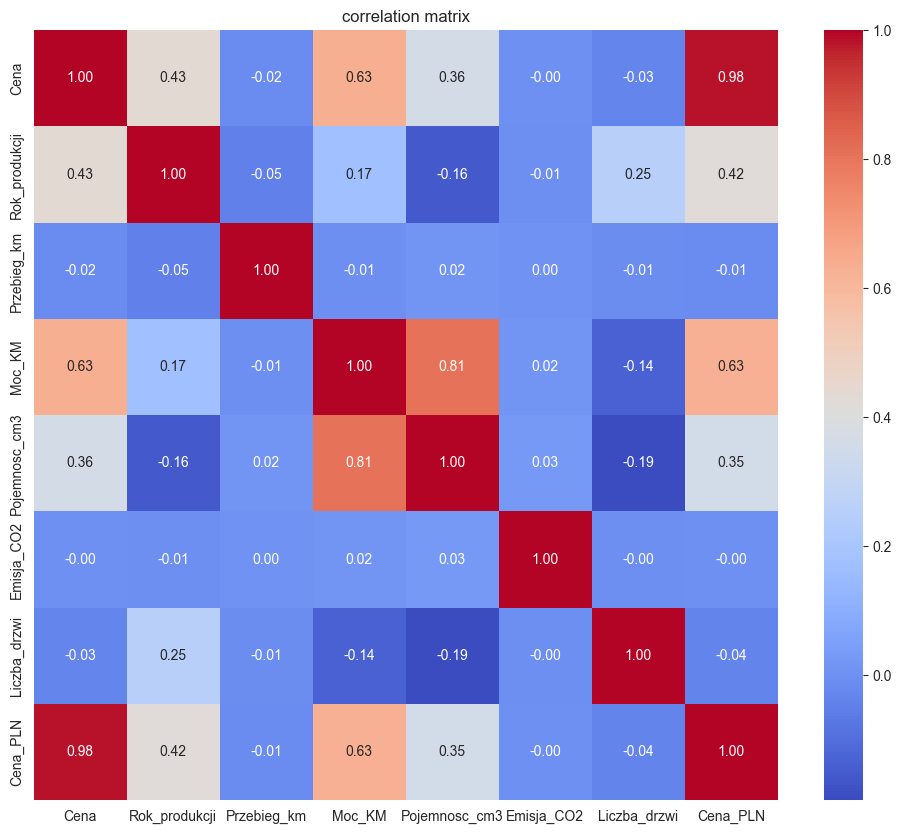

In [13]:
numeric_cols = df.select_dtypes(include=['number']).drop('ID', axis=1)
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("correlation matrix")
plt.show()

We can see that the most highly correlated features with target are: 'Rok_produkcji', 'Moc_KM'. We expect those to be the most important features in our model.

Let's investigate the distribution of ads dates to see what data is covered.

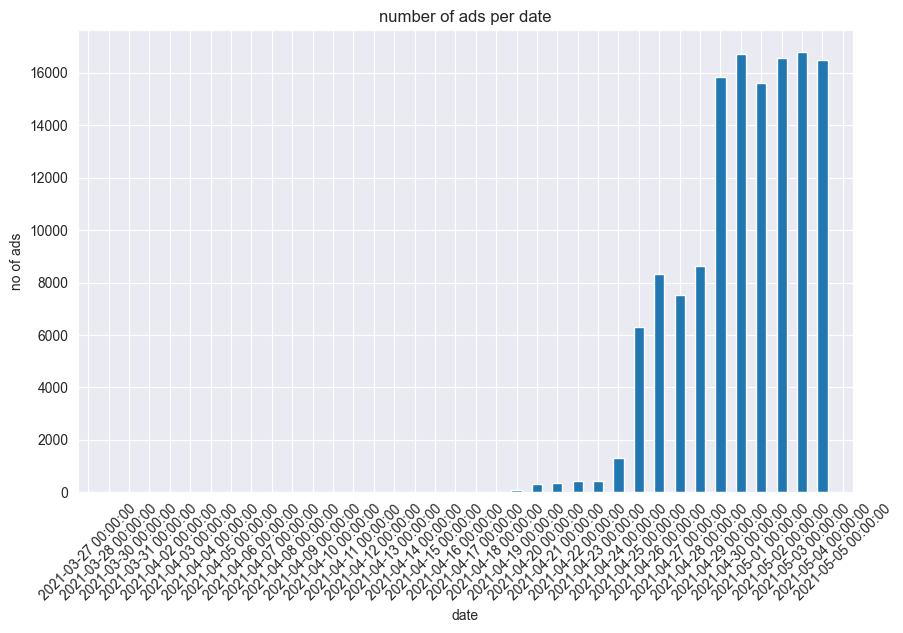

In [14]:
df['Data_pierwszej_rejestracji'] = pd.to_datetime(df['Data_pierwszej_rejestracji'], format="%d/%m/%Y", errors='coerce')
df['Data_publikacji_oferty'] = pd.to_datetime(df['Data_publikacji_oferty'], format="%d/%m/%Y", errors='coerce')

ads_sorted = df['Data_publikacji_oferty'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ads_sorted.plot(kind='bar')
plt.xlabel("date")
plt.ylabel("no of ads")
plt.title("number of ads per date")
plt.xticks(rotation=45)
plt.show()

The adds mostly come from a week of data. This is not too much variety.

In [16]:
df['day_of_week'] = df['Data_publikacji_oferty'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
print(f"average price for weekend ads: {df[df['is_weekend'] == 1]['Cena_PLN'].mean()} and for weekday ads: {df[df['is_weekend'] == 0]['Cena_PLN'].mean()}")

average price for weekend ads: 64166.74782325044 and for weekday ads: 62939.99339571297


We can see that the average price for weekend ads is higher than for weekday ads. This is interesting but we might not have enough data to check if this is statistically significant.

In [17]:
print(f"unique weekend days: {df[df['is_weekend'] == 1]['Data_publikacji_oferty'].dt.dayofweek.nunique()}")
print(f"unique weekdays: {df[df['is_weekend'] == 0]['Data_publikacji_oferty'].dt.dayofweek.nunique()}")

unique weekend days: 2
unique weekdays: 5


The higher average price could be a coincidence. We have only 2 unique weekend days in our data. We can't draw any conclusions from this.

Analysis of patterns in price & non-numerical variables:

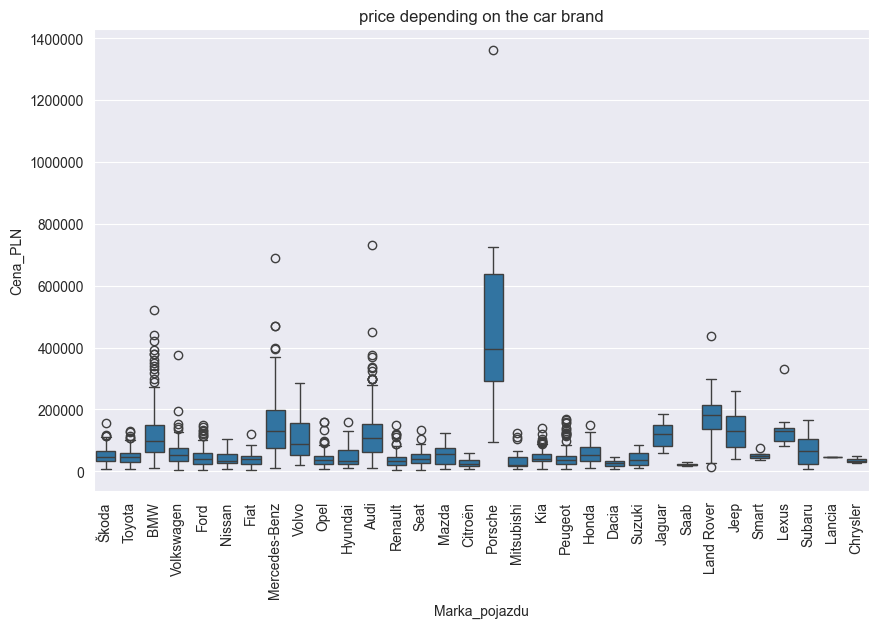

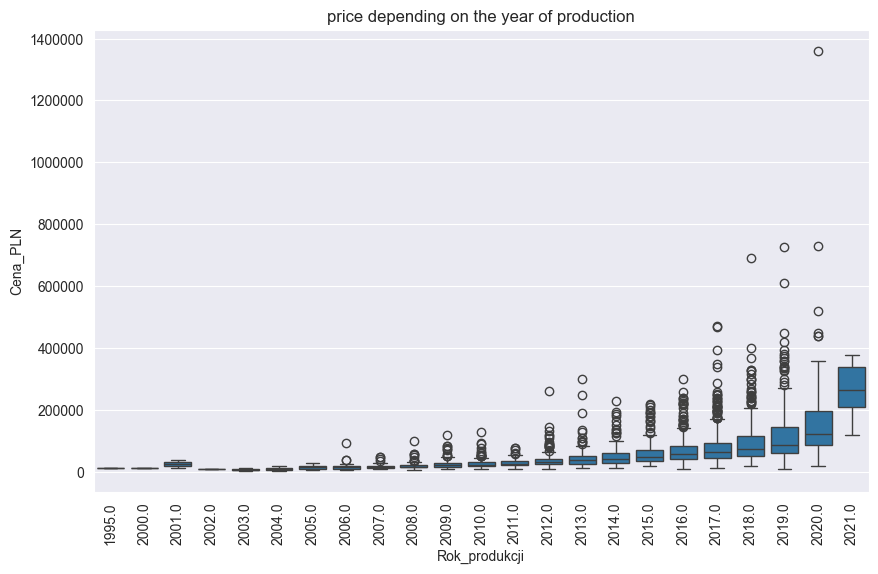

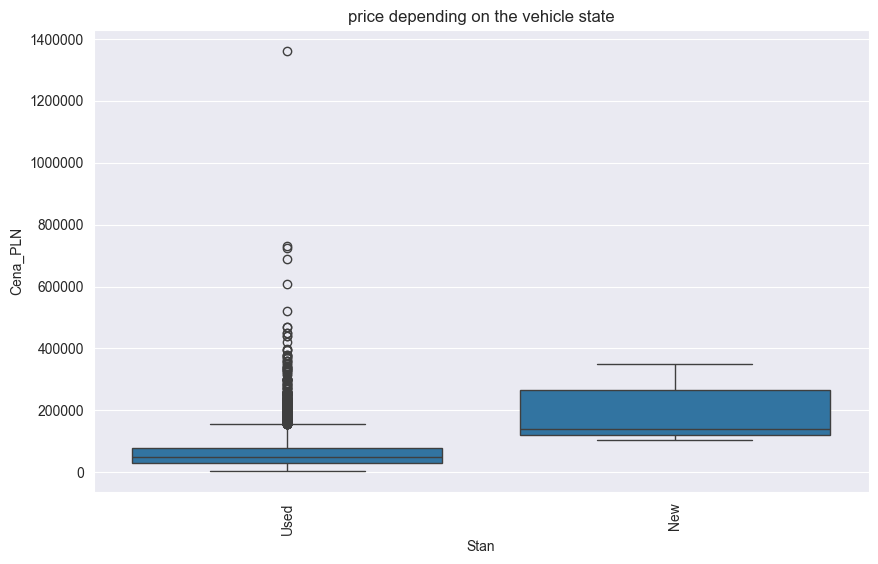

In [11]:
# car brand boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Marka_pojazdu', y='Cena_PLN')
plt.title('price depending on the car brand')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()


# prod year boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rok_produkcji', y='Cena_PLN')
plt.title('price depending on the year of production')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()

# car state boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Stan', y='Cena_PLN')
plt.title('price depending on the vehicle state')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()


graph for average price by car brand:

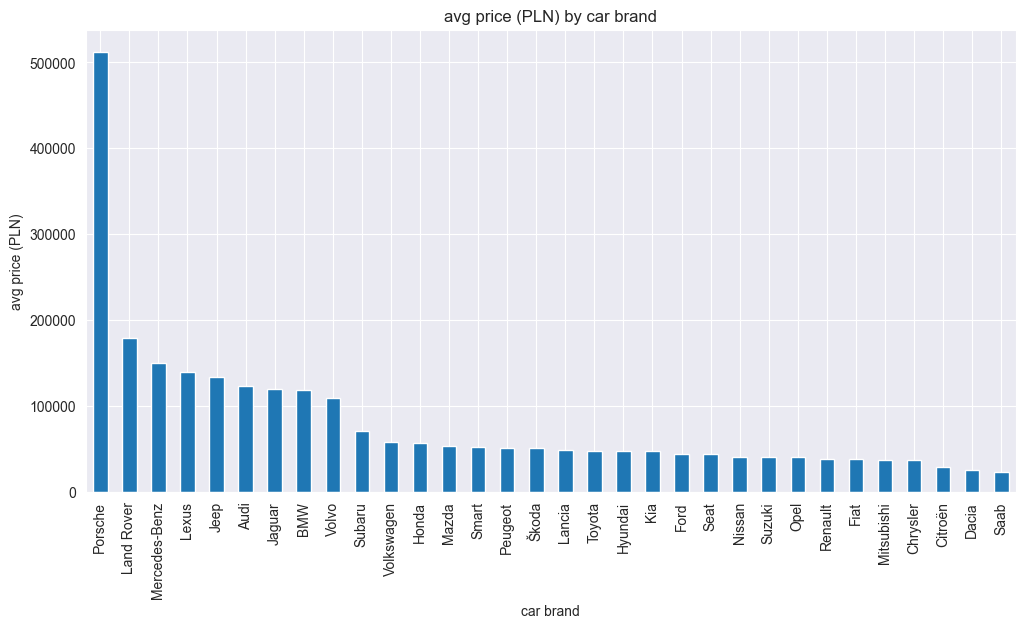

In [14]:
avg_price_by_brand = df.groupby('Marka_pojazdu')['Cena_PLN'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
avg_price_by_brand.plot(kind='bar')
plt.xlabel("car brand")
plt.ylabel("avg price (PLN)")
plt.title("avg price (PLN) by car brand")
plt.xticks(rotation=90)
plt.show()

number of ads by location:

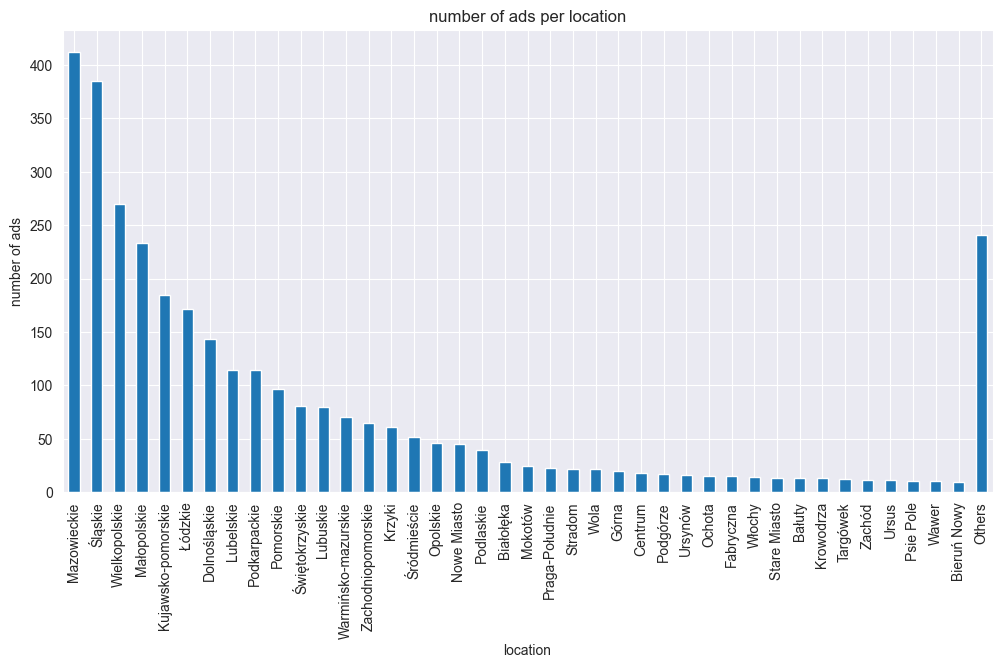

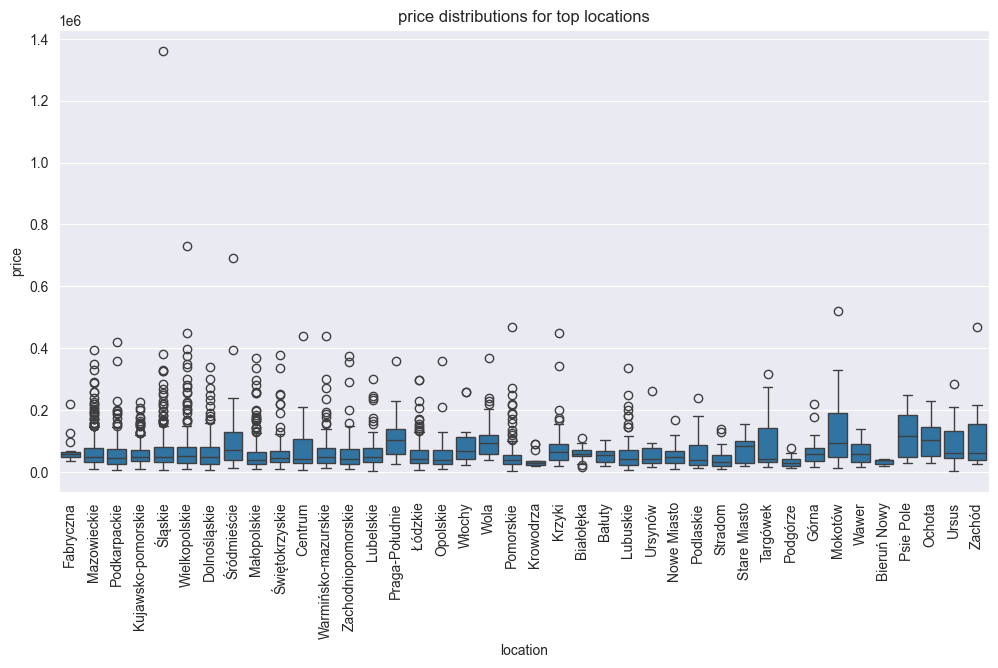

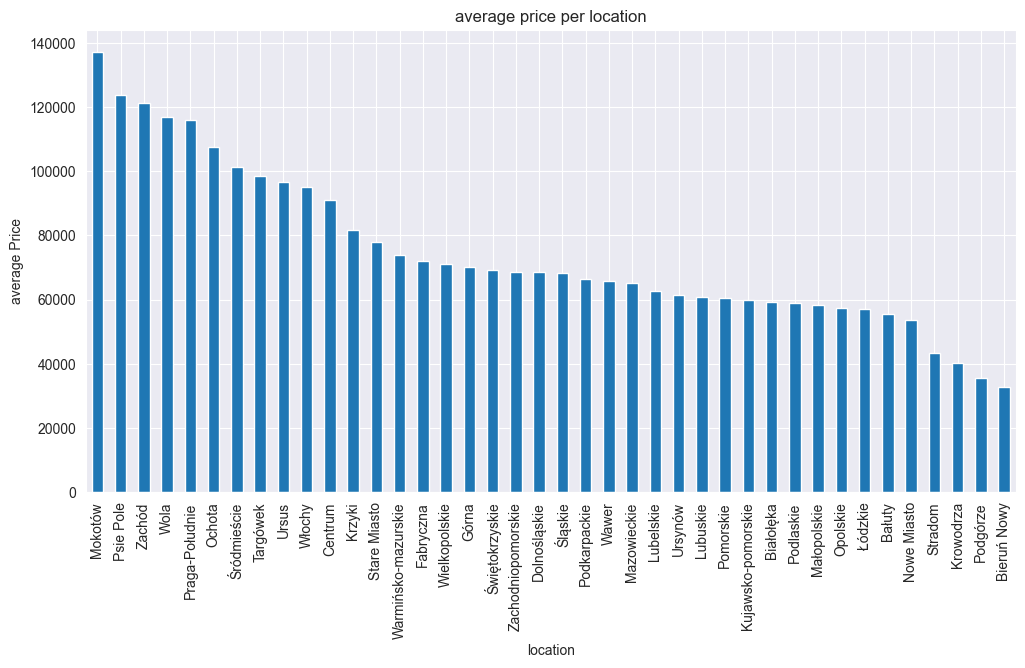

In [21]:
def extract_region_country(location):
    if pd.isnull(location):
        return None
    parts = location.split(',')
    result = parts[-1].strip() if parts else location
    result = result.replace("(Polska)", "").strip()
    return result

df['Region'] = df['Lokalizacja_oferty'].apply(extract_region_country)
ads_by_region = df['Region'].value_counts()

top_no = 40
top = ads_by_region.head(top_no).copy()
others = ads_by_region.iloc[top_no:].sum()
top["Others"] = others

plt.figure(figsize=(12,6))
top.plot(kind='bar')
plt.xlabel('location')
plt.ylabel('number of ads')
plt.title('number of ads per location')
plt.xticks(rotation=90)
plt.show()

# boxplot for price distribution in top locations
df_top = df[df['Region'].isin(top.index)]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_top, x='Region', y='Cena')
plt.title("price distributions for top locations")
plt.xlabel("location")
plt.ylabel("price")
plt.xticks(rotation=90)
plt.show()

# avg price per location
avg_prices = df_top.groupby('Region')['Cena'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
avg_prices.plot(kind='bar')
plt.title("average price per location")
plt.xlabel("location")
plt.ylabel("average Price")
plt.xticks(rotation=90)
plt.show()


creating and saving number of ads per location as a map:

In [22]:
import folium
from geopy.geocoders import Nominatim
import time
import ssl
import certifi

context = ssl.create_default_context(cafile=certifi.where())
geolocator = Nominatim(user_agent="xyz (s27162@pjwstk.edu.pl)", ssl_context=context)


map_center = [52.237049, 21.017532]
m = folium.Map(location=map_center, zoom_start=6)

for region, count in ads_by_region.items():
    query = f"{region}, Polska"
    try:
        location = geolocator.geocode(query, timeout=10)
    except Exception as e:
        print(f"error while geocoding {region}: {e}")
        location = None
    if location:
        lat, lon = location.latitude, location.longitude
        radius = 5 + count / 50
        folium.CircleMarker(
            location=[lat, lon],
            radius=radius,
            popup=f"{region}: {count} ads",
            color='blue',
            fill=True,
            fill_color='blue'
        ).add_to(m)
    else:
        print("no geocoding found for:", region)
    time.sleep(1) 
    
m.save("../reports/ads_map.html")


ModuleNotFoundError: No module named 'folium'

show map:

In [1]:
m

NameError: name 'm' is not defined

Let's now examine equipment frequency:

In [24]:
import ast
df['Wyposazenie'].fillna('[]', inplace=True)
df['Wyposazenie_list'] = df['Wyposazenie'].apply(ast.literal_eval)

unique_values = set(item for sublist in df['Wyposazenie_list'] for item in sublist)

print("Unique Equipment Options:")
print(unique_values)

Unique Equipment Options:
{'ASR (traction control)', 'Xenon lights', 'Power steering', 'Rain sensor', 'Cruise control', 'SD socket', 'Automatic air conditioning', 'Daytime running lights', 'Central locking', 'Lane assistant', 'Blind spot sensor', 'Hook', 'Electrochromic rear view mirror', 'Electric front windows', 'Tinted windows', 'Isofix', 'Air curtains', 'Parking assistant', 'ABS', 'Front parking sensors', 'Speed limiter', 'Active cruise control', 'Factory radio', 'Electrically adjustable mirrors', 'Heated front seats', 'Manual air conditioning', 'Front side airbags', 'LED lights', 'Heated side mirrors', 'HUD(head-up display)', 'CD', 'USB socket', 'Panoramic roof', 'Auxiliary heating', 'Leather upholstery', 'Twilight sensor', 'Rear side airbags', 'CD changer', 'Electrochromic side mirrors', 'Shift paddles', 'Velor upholstery', 'Multifunction steering wheel', 'MP3', 'Roof rails', 'On-board computer', 'Fog lights', 'Airbag protecting the knees', 'Sunroof', 'Dual zone air conditioning'

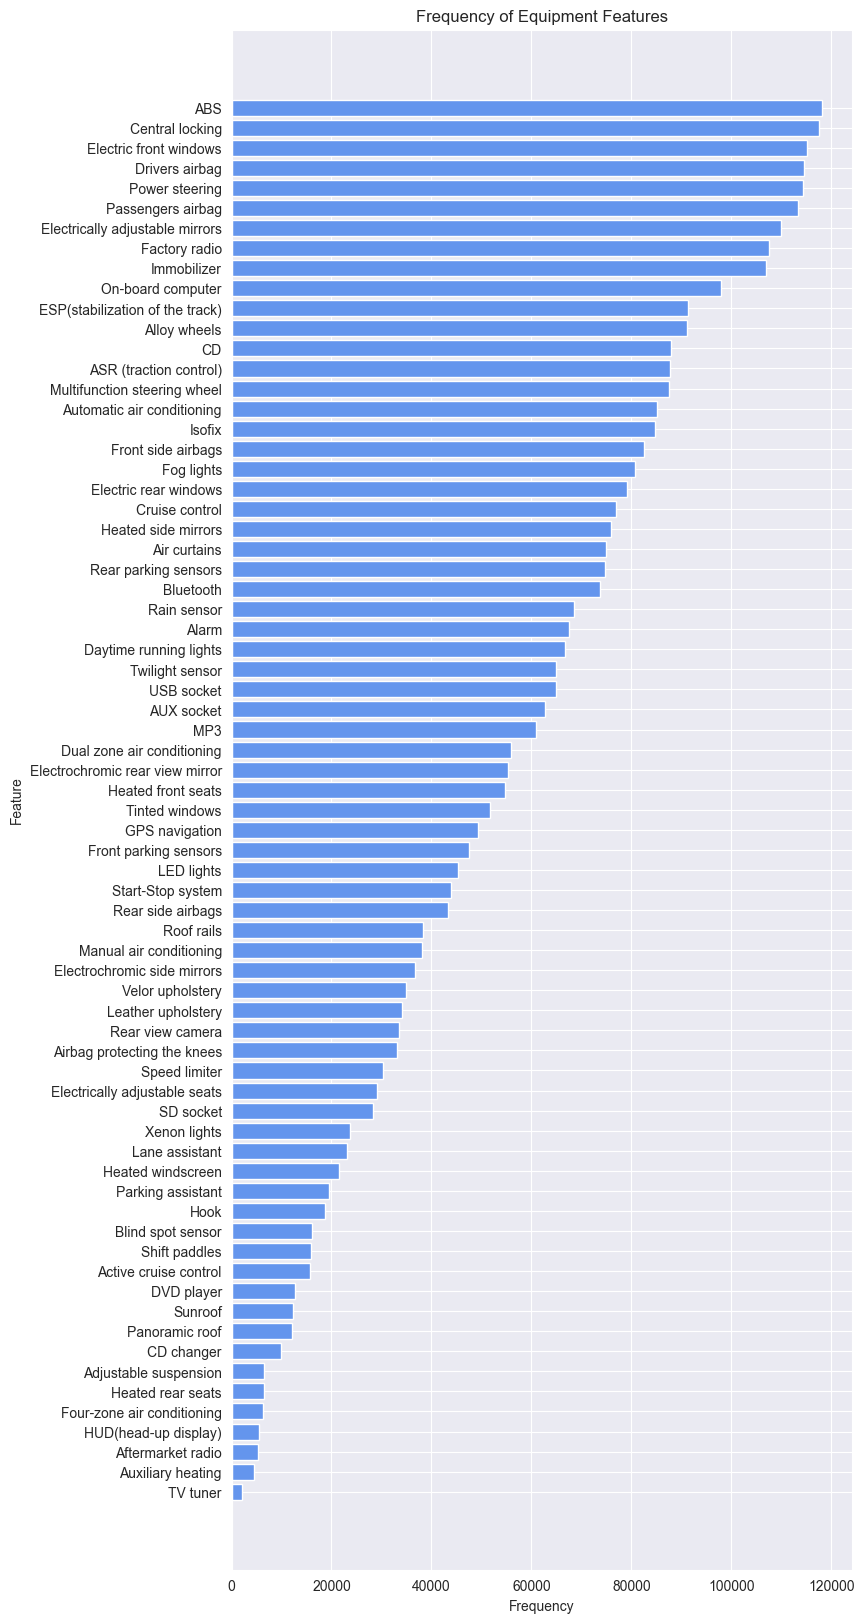

In [25]:
from collections import Counter

equipment_counts = Counter(item for sublist in df['Wyposazenie_list'] for item in sublist)

equipment_df = pd.DataFrame(equipment_counts.items(), columns=['Feature', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(8, 20))
plt.barh(equipment_df['Feature'], equipment_df['Count'], color='cornflowerblue')
plt.xlabel('Frequency')
plt.ylabel('Feature')
plt.title('Frequency of Equipment Features')
plt.gca().invert_yaxis()  
plt.show()

In [28]:
equipment_df['Percentage'] = equipment_df['Count'] / len(df) * 100
equipment_df

,Feature,Count,Percentage
0,ABS,118133,87.249348
12,Central locking,117470,86.759677
1,Electric front windows,115037,84.962739
2,Drivers airbag,114554,84.606010
3,Power steering,114405,84.495964
...,...,...,...
59,Four-zone air conditioning,6284,4.641166
57,HUD(head-up display),5482,4.048834
66,Aftermarket radio,5283,3.901859
63,Auxiliary heating,4589,3.389292


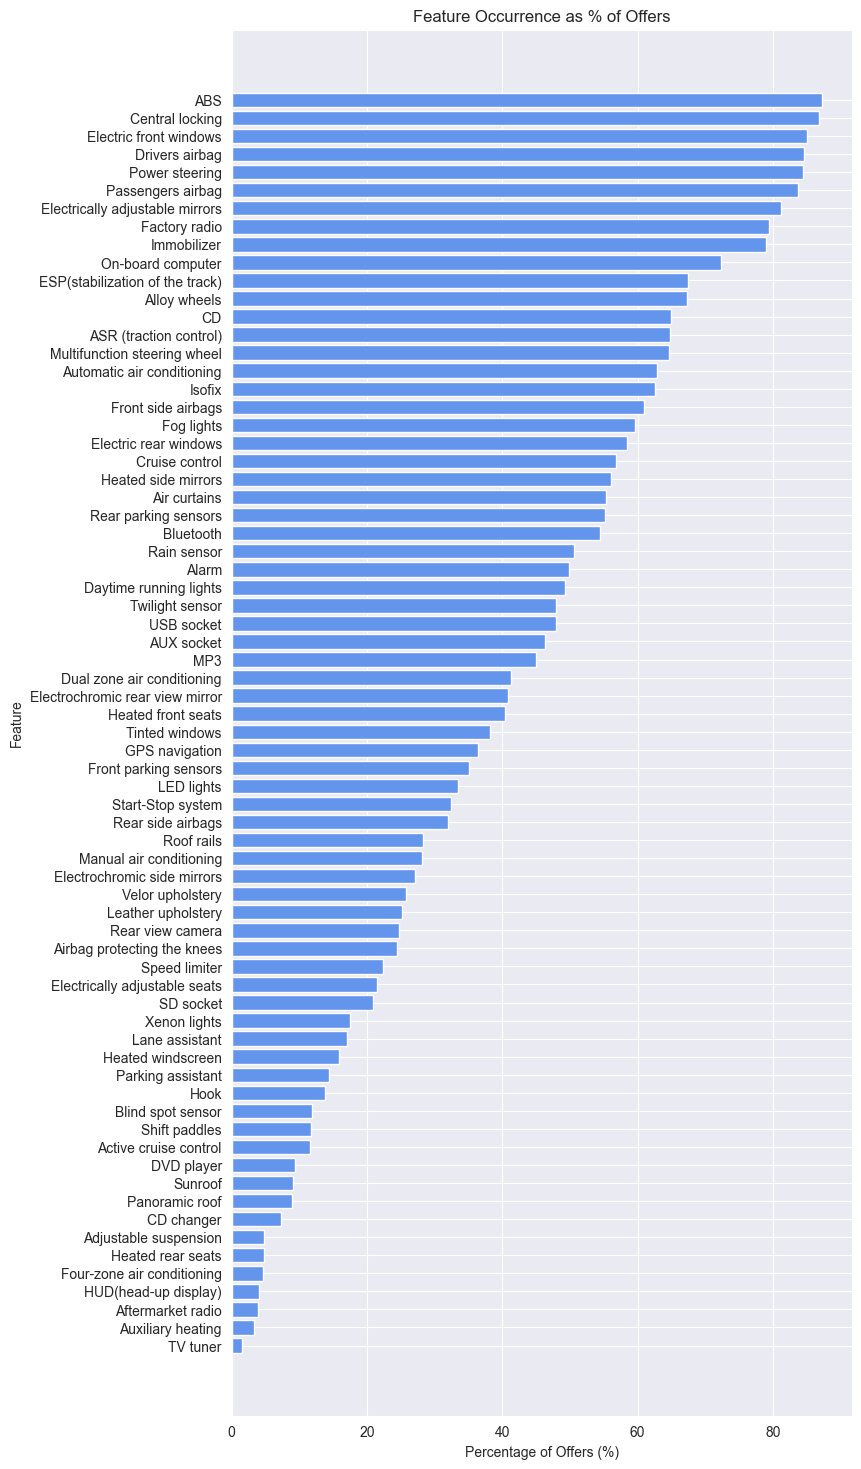

In [29]:
equipment_df = equipment_df.sort_values(by='Percentage', ascending=False)

plt.figure(figsize=(8, 18))
plt.barh(equipment_df['Feature'], equipment_df['Percentage'], color='cornflowerblue')
plt.xlabel('Percentage of Offers (%)')
plt.ylabel('Feature')
plt.title('Feature Occurrence as % of Offers')
plt.gca().invert_yaxis()  # Invert y-axis to show the most common on top
plt.show()

There are some features that are common to almost all cars (ex.ABS, Central Locking, Airbac)

Let's define set of basic and rare features. To do this, let's first check the distribution of the price per each feature.

count    4.216700e+04
mean     8.214591e+04
std      1.067457e+05
min      7.990000e+02
25%      2.290000e+04
50%      4.698600e+04
75%      9.900000e+04
max      2.370000e+06
Name: Cena_PLN, dtype: float64


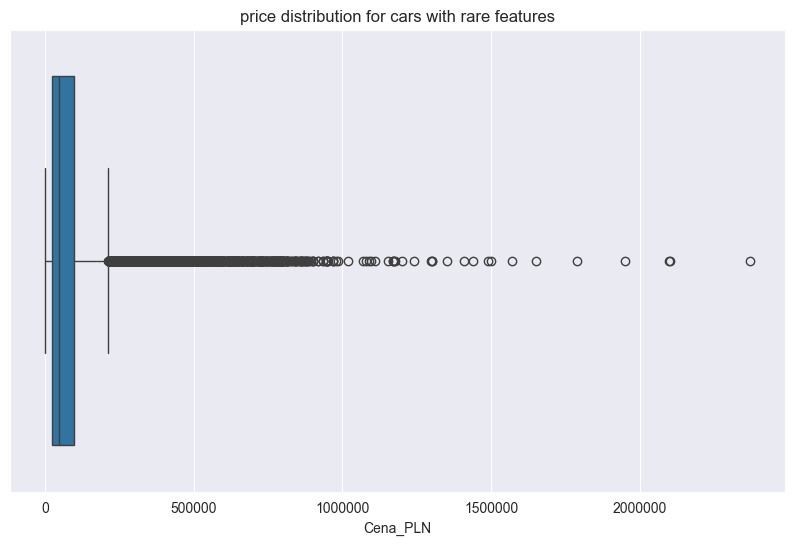

count     93230.000000
mean      54777.748504
std       80348.430864
min         585.000000
25%       15999.000000
50%       31500.000000
75%       67500.000000
max     6999000.000000
Name: Cena_PLN, dtype: float64


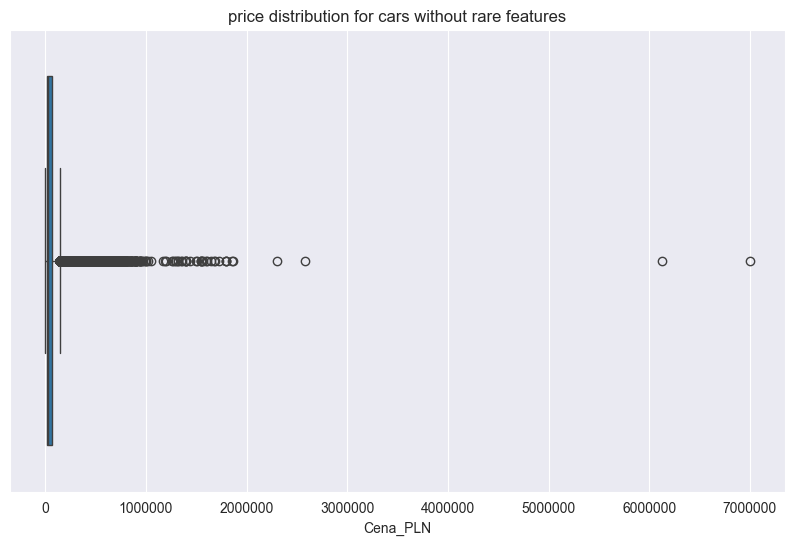

In [30]:
rare_features = equipment_df[equipment_df['Percentage'] < 10].Feature.to_list()

df_rare = df[df['Wyposazenie_list'].apply(lambda x: any(item in x for item in rare_features))]
print(df_rare['Cena_PLN'].describe())

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_rare, x='Cena_PLN')
plt.title('price distribution for cars with rare features')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

#price range for cars that don't have any rare feature
df_common = df[~df['Wyposazenie_list'].apply(lambda x: any(item in x for item in rare_features))]
with pd.option_context('display.float_format', '{:.6f}'.format):
    print(df_common['Cena_PLN'].describe())
    
# boxplot for price distribution in cars without rare features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_common, x='Cena_PLN')
plt.title('price distribution for cars without rare features')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

We can see that cars with rare features are on average more expensive than cars without them. There are some outliers in both cases. I.e. very expensive cars without rare features. However, the minimum price for cars with rare features is higher than the min price for cars without them.

In [31]:
all_features = equipment_df.Feature.to_list()

In [32]:
# print min price of a car for each feature
min_max_price_per_feature = []
for feature in all_features:
    print(feature)
    df_feature = df[df['Wyposazenie_list'].apply(lambda x: feature in x)]
    min_price = df_feature['Cena_PLN'].min()
    max_price = df_feature['Cena_PLN'].max()
    min_max_price_per_feature.append({"feature": feature, "min_price": min_price, "max_price": max_price})

ABS
Central locking
Electric front windows
Drivers airbag
Power steering
Passengers airbag
Electrically adjustable mirrors
Factory radio
Immobilizer
On-board computer
ESP(stabilization of the track)
Alloy wheels
CD
ASR (traction control)
Multifunction steering wheel
Automatic air conditioning
Isofix
Front side airbags
Fog lights
Electric rear windows
Cruise control
Heated side mirrors
Air curtains
Rear parking sensors
Bluetooth
Rain sensor
Alarm
Daytime running lights
Twilight sensor
USB socket
AUX socket
MP3
Dual zone air conditioning
Electrochromic rear view mirror
Heated front seats
Tinted windows
GPS navigation
Front parking sensors
LED lights
Start-Stop system
Rear side airbags
Roof rails
Manual air conditioning
Electrochromic side mirrors
Velor upholstery
Leather upholstery
Rear view camera
Airbag protecting the knees
Speed limiter
Electrically adjustable seats
SD socket
Xenon lights
Lane assistant
Heated windscreen
Parking assistant
Hook
Blind spot sensor
Shift paddles
Active cr

In [33]:
min_max_price_per_ft_df = pd.DataFrame(min_max_price_per_feature)
min_max_price_per_ft_df

,feature,min_price,max_price
0,ABS,585.0,6999000.0
1,Central locking,585.0,6999000.0
2,Electric front windows,585.0,6999000.0
3,Drivers airbag,585.0,6999000.0
4,Power steering,585.0,6999000.0
...,...,...,...
65,Four-zone air conditioning,2199.0,2370000.0
66,HUD(head-up display),2500.0,2370000.0
67,Aftermarket radio,900.0,968000.0
68,Auxiliary heating,1975.0,1500000.0


In [34]:
min_max_price_per_ft_df.max_price.describe()

count    7.000000e+01
mean     4.350682e+06
std      2.539716e+06
min      9.680000e+05
25%      2.101970e+06
50%      2.370000e+06
75%      6.999000e+06
max      6.999000e+06
Name: max_price, dtype: float64

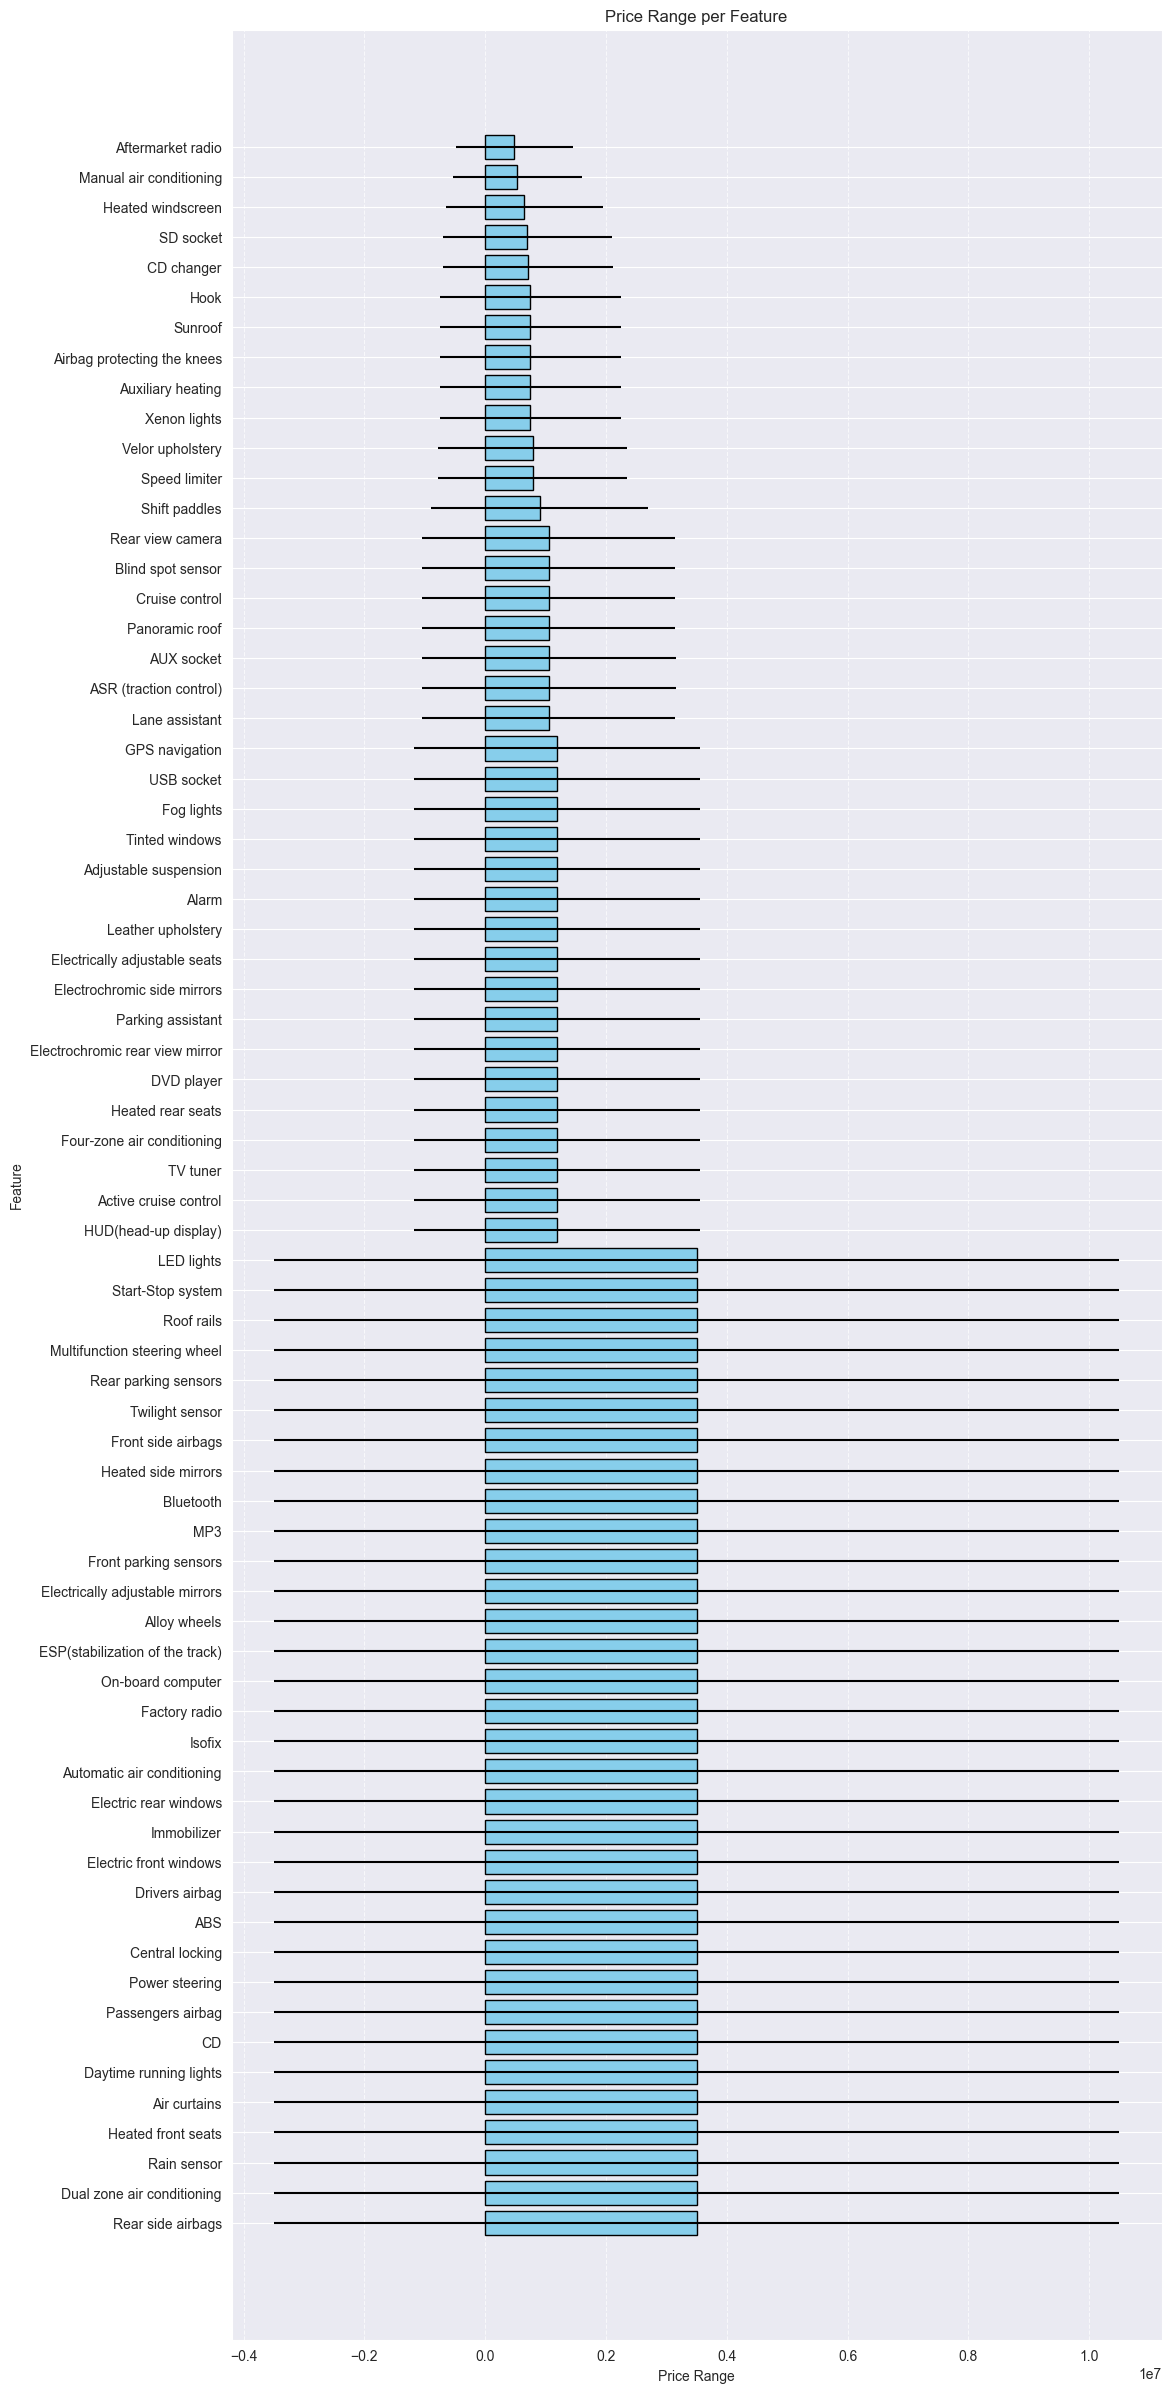

In [35]:
min_max_price_per_ft_df['MeanPrice'] = (min_max_price_per_ft_df['min_price'] + min_max_price_per_ft_df['max_price']) / 2
min_max_price_per_ft_df['Error'] = min_max_price_per_ft_df['max_price'] - min_max_price_per_ft_df['min_price']
min_max_price_per_ft_df = min_max_price_per_ft_df.sort_values('MeanPrice', ascending=False)

plt.figure(figsize=(12, 30))
plt.barh(min_max_price_per_ft_df['feature'], min_max_price_per_ft_df['MeanPrice'], xerr=min_max_price_per_ft_df['Error'], color='skyblue', edgecolor='black')
plt.xlabel('Price Range')
plt.ylabel('Feature')
plt.title('Price Range per Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [36]:
min_max_price_per_ft_df.feature.tail(11)

44               Velor upholstery
51                   Xenon lights
68              Auxiliary heating
47    Airbag protecting the knees
60                        Sunroof
55                           Hook
62                     CD changer
50                      SD socket
53              Heated windscreen
42        Manual air conditioning
67              Aftermarket radio
Name: feature, dtype: object

Here we can see a list of features that are typically associated with higher prices. These features are usually found in more expensive cars. Those are features where price range is the lowest.

Let's check if the number of features in a car influences car price.

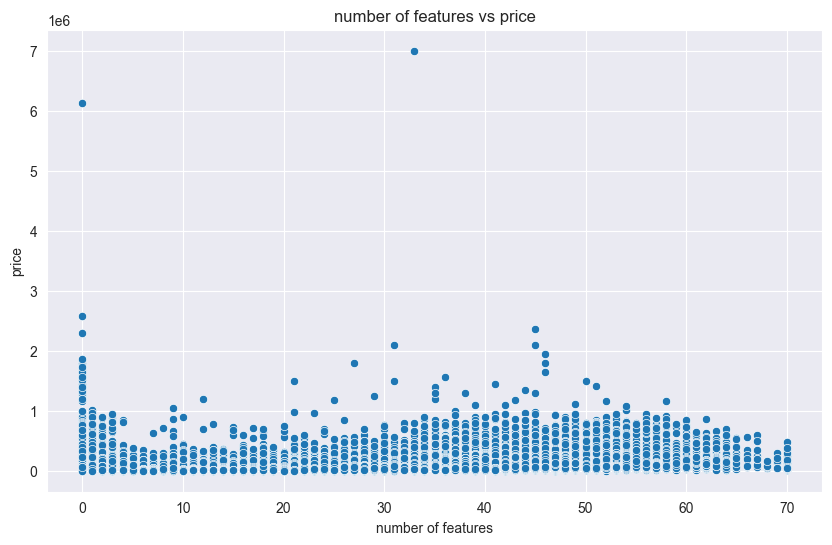

In [37]:
df["Wyposazenie_list_len"] = df["Wyposazenie_list"].apply(len)
# plot scatter number of features vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Wyposazenie_list_len', y='Cena_PLN')
plt.title('number of features vs price')
plt.xlabel('number of features')
plt.ylabel('price')
plt.show()


In [38]:
# is there a correlation between number of features and price?
corr = df['Wyposazenie_list_len'].corr(df['Cena_PLN'])
print(f"correlation between number of features and price: {corr} is weak")

correlation between number of features and price: 0.2160506920759445 is weak


It is not important how many features a car has, but which features it has. The number of features does not correlate with the price.

In [41]:
from scripts.utils import assign_voivodeship
df["Wojewodztwo"] = df["Lokalizacja_oferty"].apply(assign_voivodeship)

Are there any differences in prices between voivodeships?

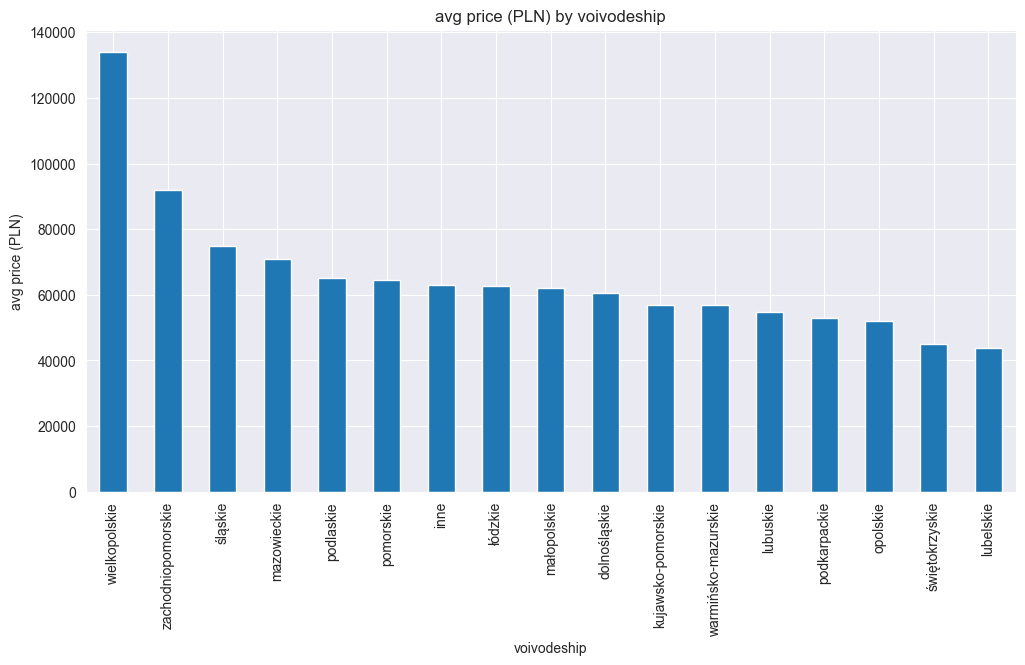

In [42]:
avg_price_by_voivodeship = df.groupby('Wojewodztwo')['Cena_PLN'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
avg_price_by_voivodeship.plot(kind='bar')
plt.xlabel("voivodeship")
plt.ylabel("avg price (PLN)")
plt.title("avg price (PLN) by voivodeship")
plt.xticks(rotation=90)
plt.show()

Let's explore if anything is driving the price differences between voivodeships. Are there any extreme cases?

In [43]:
voivodeship_price_ranges = df.groupby('Wojewodztwo')['Cena_PLN'].agg(['min', 'max', 'mean']).sort_values(by='mean', ascending=False)
voivodeship_price_ranges

,min,max,mean
Wojewodztwo,,,
wielkopolskie,1300.0,2583000.0,134105.942241
zachodniopomorskie,1000.0,699900.0,92036.693348
śląskie,585.0,1730000.0,74879.983290
mazowieckie,700.0,2370000.0,70844.075109
podlaskie,1699.0,1170000.0,65068.247916
pomorskie,900.0,2300000.0,64547.141083
inne,1200.0,1555600.0,63091.435199
łódzkie,999.0,1256214.0,62789.508867
małopolskie,950.0,1300000.0,62166.498515


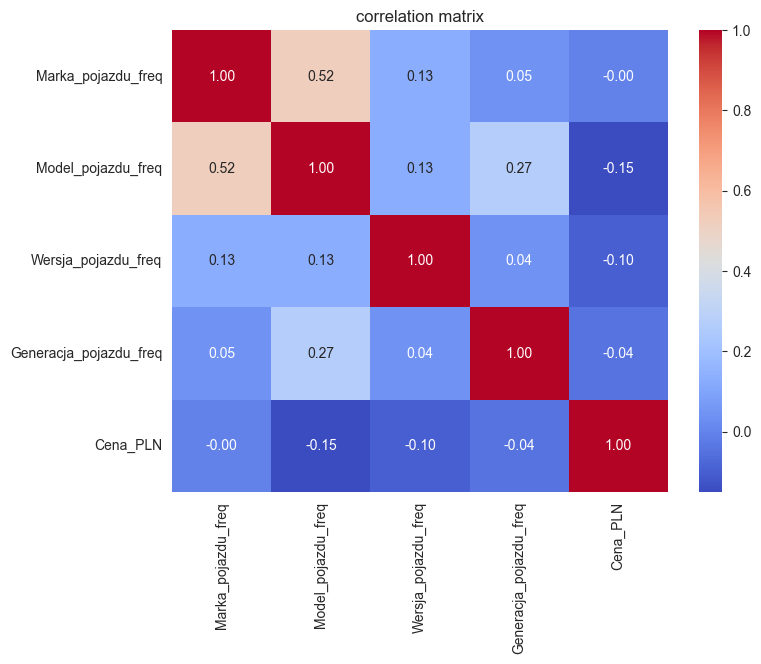

In [44]:
df['Marka_pojazdu_freq'] = df['Marka_pojazdu'].map(df['Marka_pojazdu'].value_counts() / len(df))
df['Model_pojazdu_freq'] = df['Model_pojazdu'].map(df['Model_pojazdu'].value_counts() / len(df))
df['Wersja_pojazdu_freq'] = df['Wersja_pojazdu'].map(df['Wersja_pojazdu'].value_counts() / len(df))
df['Generacja_pojazdu_freq'] = df['Generacja_pojazdu'].map(df['Generacja_pojazdu'].value_counts() / len(df))

# correlation with price
corr = df[['Marka_pojazdu_freq', 'Model_pojazdu_freq', 'Wersja_pojazdu_freq', 'Generacja_pojazdu_freq', 'Cena_PLN']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("correlation matrix")
plt.show()

Only the frequency of car's make correlates with price which suggests it might be important

In [46]:
df['Naped'].value_counts()

Naped
Front wheels                    88699
Rear wheels                     11365
4x4 (permanent)                 10750
4x4 (attached automatically)     9767
4x4 (attached manually)          1762
Name: count, dtype: int64

There are 3 4x4 values. Let's see if they are similar enough so we can change them to one value.

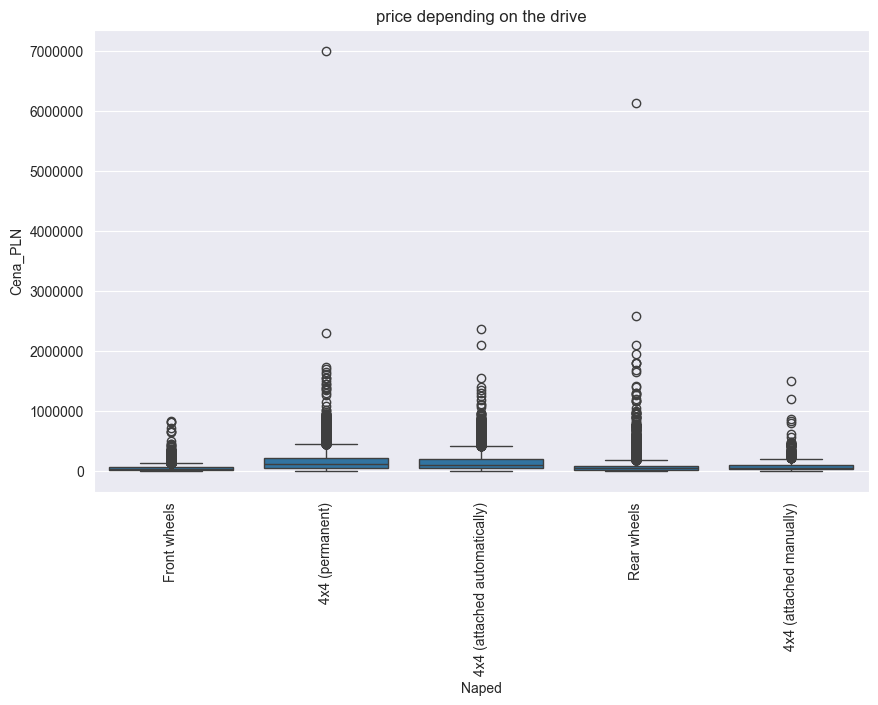

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Naped', y='Cena_PLN')
plt.title('price depending on the drive')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()

In [49]:
df.groupby('Naped')['Cena_PLN'].describe()

,count,mean,std,min,25%,50%,75%,max
Naped,,,,,,,,
4x4 (attached automatically),9767.0,136221.422545,135312.750434,1000.0,41000.0,93990.0,189900.0,2370000.0
4x4 (attached manually),1762.0,83197.643587,97843.808503,3999.0,27550.0,48600.0,99375.0,1500000.0
4x4 (permanent),10750.0,159040.626512,168720.871516,2400.0,54900.0,109900.0,210000.0,6999000.0
Front wheels,88699.0,44279.288853,40998.611262,585.0,15900.0,29900.0,59999.0,824932.0
Rear wheels,11365.0,73892.125473,122252.780997,1650.0,21000.0,42900.0,86000.0,6122893.0


4x4 attatched automatically and 4x4 permanent are similar enough to be combined into one value. 4x4 attached manually could be different due to lower number of examples.

Let's find the most expensive car models

In [60]:
df.groupby('Model_pojazdu')['Cena_PLN'].describe()

,count,mean,std,min,25%,50%,75%,max
Model_pojazdu,,,,,,,,
1.3,1.0,5900.000000,NaN,5900.0,5900.0,5900.0,5900.0,5900.0
1.5,4.0,25700.000000,9771.727926,12500.0,21875.0,27450.0,31275.0,35400.0
1.6,4.0,3837.500000,1507.412242,2150.0,3162.5,3700.0,4375.0,5800.0
10,1.0,11900.000000,NaN,11900.0,11900.0,11900.0,11900.0,11900.0
100,11.0,16645.454545,12490.025111,6000.0,8400.0,15000.0,19200.0,50000.0
...,...,...,...,...,...,...,...,...
iQ,9.0,17203.222222,5833.943859,9999.0,14300.0,14900.0,18900.0,29900.0
ix20,123.0,29184.918699,7204.079291,13900.0,24050.0,27500.0,32700.0,51900.0
ix35,462.0,42614.056277,7062.850162,21700.0,37125.0,41500.0,46900.0,64400.0


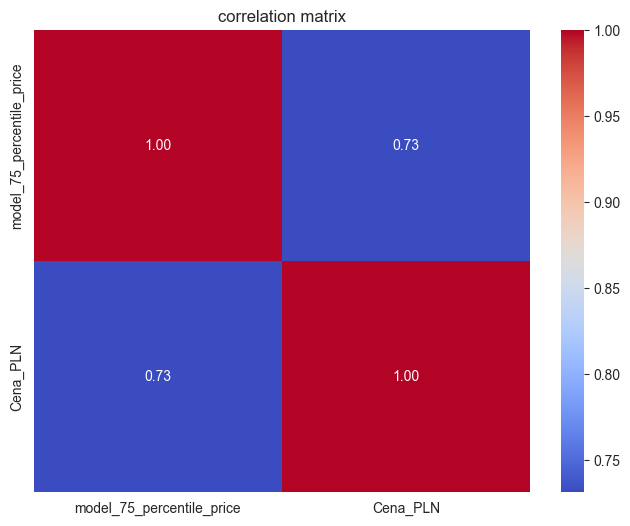

In [62]:
df["model_75_percentile_price"] = df.groupby('Model_pojazdu')['Cena_PLN'].transform(lambda x: x.quantile(0.75))
# correlation with price
corr = df[['model_75_percentile_price', 'Cena_PLN']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("correlation matrix")
plt.show()


In [68]:
# check if different car makes have the same models names
for i, g in df.groupby('Model_pojazdu'):
    if len(g['Marka_pojazdu'].unique()) > 1:
        print(i, g['Marka_pojazdu'].unique())

In [75]:
# create a map where Key is car model and Value is 75 percentile price
model_75_percentile_price = df.groupby('Model_pojazdu')['Cena_PLN'].quantile(0.75).to_dict()
# save dictionary to file
import json
with open('model_75_percentile_price.json', 'w') as f:
    json.dump(model_75_percentile_price, f)

In [76]:
df['Cena_PLN'].describe()

count    1.353970e+05
mean     6.330108e+04
std      9.030236e+04
min      5.850000e+02
25%      1.780000e+04
50%      3.590000e+04
75%      7.600000e+04
max      6.999000e+06
Name: Cena_PLN, dtype: float64

In [58]:
test_df = pd.read_csv('../data/raw/sales_ads_test.csv')
# check if in test there are some models of cars not in train
models_not_in_train = test_df[~test_df['Model_pojazdu'].isin(df['Model_pojazdu'])]['Model_pojazdu'].unique()
print(f"number of unique models not in train: {len(models_not_in_train)}, number of unique models in test: {len(test_df['Model_pojazdu'].unique())}, number of unique models in train: {len(df['Model_pojazdu'].unique())}")
models_not_in_train

number of unique models not in train: 62, number of unique models in test: 998, number of unique models in train: 1140


array(['Space Gear', 'Samara', 'Fuego', 'Forman', 'Marquis', 'Campo',
       'Rendezvous', 'F430', 'Neon', 'Baja', 'Seria 700', 'Mercury',
       'TGE', '360', 'Nova', '237', 'Joice', 'Wind', 'Roadmaster', '3200',
       'L300', '1000', 'Glory 580', 'Mondial', '928', '945', 'Park Ward',
       'F12berlinetta', 'CJ', 'Alaskan', 'Integra', 'Taurus', '128',
       '2141', '620', 'Bosto', 'A751', 'Manta', 'Bolt', 'Testarossa',
       'L400', '90', '204', 'HS 250h', '131', '605', 'King Cab', 'Espero',
       '57', '4C', 'Ambra', 'PS-10', '304', 'Senova X55', 'Senova X35',
       'Terrain', 'xA', 'Seria 200', 'Horizon', 'TR3', 'Arnage',
       'GTC4Lusso'], dtype=object)